In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data = pd.read_csv('chicago.csv')

In [3]:
data.head()

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,JF156487,12/01/2021 12:01:00 AM,056XX N SPAULDING AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,N,N,1711,39.0,08A,NaN,NaN,NaN,NaN,NaN
1,JE362576,09/05/2021 02:47:00 PM,102XX S VERNON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,N,Y,511,9.0,14,1181052.0,1837198.0,41.708515,-87.612580,"(41.708514886, -87.61258026)"
2,JE364188,09/07/2021 01:00:00 AM,033XX W MAYPOLE AVE,0560,ASSAULT,SIMPLE,SIDEWALK,Y,N,1123,28.0,08A,1154061.0,1900783.0,41.883579,-87.709735,"(41.883578698, -87.709734846)"
3,JE364232,09/07/2021 02:26:00 AM,062XX S UNION AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESTAURANT,N,N,711,16.0,14,1172637.0,1863365.0,41.780510,-87.642627,"(41.780509717, -87.642627358)"
4,JE369345,08/14/2021 06:20:00 AM,0000X W TERMINAL ST,0890,THEFT,FROM BUILDING,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,N,N,1651,41.0,06,1100317.0,1935229.0,41.979006,-87.906463,"(41.979006297, -87.906463155)"


In [4]:
data.describe()

,BEAT,WARD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE
count,206483.000000,206472.000000,2.033440e+05,2.033440e+05,203344.000000,203344.000000
mean,1148.800327,23.131611,1.165253e+06,1.885894e+06,41.842476,-87.669105
std,701.946570,13.985234,1.647935e+04,3.191952e+04,0.087783,0.059984
min,111.000000,1.000000,1.091242e+06,1.813909e+06,41.644608,-87.939733
25%,611.000000,9.000000,1.153551e+06,1.858271e+06,41.766325,-87.711625
50%,1024.000000,24.000000,1.167090e+06,1.891495e+06,41.857907,-87.662378
75%,1723.000000,34.000000,1.176847e+06,1.909105e+06,41.906432,-87.626643
max,2535.000000,50.000000,1.205119e+06,1.951499e+06,42.022537,-87.524529


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206483 entries, 0 to 206482
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CASE#                   206483 non-null  object 
 1   DATE  OF OCCURRENCE     206483 non-null  object 
 2   BLOCK                   206483 non-null  object 
 3    IUCR                   206483 non-null  object 
 4    PRIMARY DESCRIPTION    206483 non-null  object 
 5    SECONDARY DESCRIPTION  206483 non-null  object 
 6    LOCATION DESCRIPTION   205826 non-null  object 
 7   ARREST                  206483 non-null  object 
 8   DOMESTIC                206483 non-null  object 
 9   BEAT                    206483 non-null  int64  
 10  WARD                    206472 non-null  float64
 11  FBI CD                  206483 non-null  object 
 12  X COORDINATE            203344 non-null  float64
 13  Y COORDINATE            203344 non-null  float64
 14  LATITUDE            

In [7]:
data[data['LOCATION'].isnull()]

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,JF156487,12/01/2021 12:01:00 AM,056XX N SPAULDING AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,N,N,1711,39.0,08A,NaN,NaN,NaN,NaN,NaN
17,JE413628,10/16/2021 04:00:00 AM,047XX S HAMLIN AVE,0820,THEFT,$500 AND UNDER,ALLEY,N,N,821,14.0,06,NaN,NaN,NaN,NaN,NaN
18,JE281374,06/24/2021 05:27:00 PM,003XX N PEORIA,0810,THEFT,OVER $500,PARKING LOT / GARAGE (NON RESIDENTIAL),N,N,1214,27.0,06,NaN,NaN,NaN,NaN,NaN
28,JE184972,03/29/2021 03:30:00 PM,056XX N SPAULDING AVE,0890,THEFT,FROM BUILDING,APARTMENT,N,N,1711,39.0,06,NaN,NaN,NaN,NaN,NaN
44,JE366565,09/05/2021 06:35:00 PM,014XX W RANDOLPH ST,0870,THEFT,POCKET-PICKING,PARK PROPERTY,N,N,1224,27.0,06,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206361,JF153444,12/20/2021 09:00:00 AM,028XX N RIVERWALK DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,N,N,1432,32.0,11,NaN,NaN,NaN,NaN,NaN
206377,JF155433,12/10/2021 12:00:00 PM,039XX W MONROE ST,0560,ASSAULT,SIMPLE,RESIDENCE,N,N,1122,28.0,08A,NaN,NaN,NaN,NaN,NaN
206430,JF154717,11/24/2021 12:00:00 AM,087XX S RACINE AVE,1156,DECEPTIVE PRACTICE,ATTEMPT - FINANCIAL IDENTITY THEFT,RESIDENCE,N,N,2222,21.0,11,NaN,NaN,NaN,NaN,NaN
206434,JF111484,12/30/2021 04:00:00 PM,005XX S KOSTNER AVE,0325,ROBBERY,VEHICULAR HIJACKING,CONVENIENCE STORE,Y,N,1131,28.0,03,NaN,NaN,NaN,NaN,NaN


In [8]:
data['DATE  OF OCCURRENCE'] = pd.to_datetime(data['DATE  OF OCCURRENCE'])

In [8]:
data.columns

Index(['CASE#', 'DATE  OF OCCURRENCE', 'BLOCK', ' IUCR',
       ' PRIMARY DESCRIPTION', ' SECONDARY DESCRIPTION',
       ' LOCATION DESCRIPTION', 'ARREST', 'DOMESTIC', 'BEAT', 'WARD', 'FBI CD',
       'X COORDINATE', 'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [9]:
new_data = data.copy()
new_data.rename(columns={'CASE#':'case_id','DATE  OF OCCURRENCE':'date','BLOCK':'block',
                        ' IUCR':'crime_code',' PRIMARY DESCRIPTION':'fisrt_de',' SECONDARY DESCRIPTION':'second_de',
                        ' LOCATION DESCRIPTION':'location','ARREST':'arrested','DOMESTIC':'domestic',
                        'BEAT':'beats_id','WARD':'ward','FBI CD':'fbi_cd','X COORDINATE':'x_co',
                        'Y COORDINATE':'y_co','LATITUDE':'latitude','LONGITUDE':'longitude','LOCATION':'real_loc'},inplace=True)

In [10]:
new_data.head()

,case_id,date,block,crime_code,fisrt_de,second_de,location,arrested,domestic,beats_id,ward,fbi_cd,x_co,y_co,latitude,longitude,real_loc
0,JF156487,2021-12-01 00:01:00,056XX N SPAULDING AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,N,N,1711,39.0,08A,NaN,NaN,NaN,NaN,NaN
1,JE362576,2021-09-05 14:47:00,102XX S VERNON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,N,Y,511,9.0,14,1181052.0,1837198.0,41.708515,-87.612580,"(41.708514886, -87.61258026)"
2,JE364188,2021-09-07 01:00:00,033XX W MAYPOLE AVE,0560,ASSAULT,SIMPLE,SIDEWALK,Y,N,1123,28.0,08A,1154061.0,1900783.0,41.883579,-87.709735,"(41.883578698, -87.709734846)"
3,JE364232,2021-09-07 02:26:00,062XX S UNION AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESTAURANT,N,N,711,16.0,14,1172637.0,1863365.0,41.780510,-87.642627,"(41.780509717, -87.642627358)"
4,JE369345,2021-08-14 06:20:00,0000X W TERMINAL ST,0890,THEFT,FROM BUILDING,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,N,N,1651,41.0,06,1100317.0,1935229.0,41.979006,-87.906463,"(41.979006297, -87.906463155)"


In [11]:
new_data['year'] = new_data.date.dt.year
new_data['month'] = new_data.date.dt.month
new_data['week'] = new_data.date.dt.week
new_data['woy'] = new_data.date.dt.weekofyear
new_data['dow'] = new_data.date.dt.dayofweek
new_data['hour'] = new_data.date.dt.hour

/var/folders/ms/sw2xn92n7jv5f5l4jntz4ml40000gn/T/ipykernel_4413/1394589128.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  new_data['week'] = new_data.date.dt.week
/var/folders/ms/sw2xn92n7jv5f5l4jntz4ml40000gn/T/ipykernel_4413/1394589128.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  new_data['woy'] = new_data.date.dt.weekofyear


In [13]:
new_data[new_data.year==2021]

,case_id,date,block,crime_code,fisrt_de,second_de,location,arrested,domestic,beats_id,...,y_co,latitude,longitude,real_loc,year,month,week,woy,dow,hour
0,JF156487,2021-12-01 00:01:00,056XX N SPAULDING AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,N,N,1711,...,NaN,NaN,NaN,NaN,2021,12,48,48,2,0
1,JE362576,2021-09-05 14:47:00,102XX S VERNON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,N,Y,511,...,1837198.0,41.708515,-87.612580,"(41.708514886, -87.61258026)",2021,9,35,35,6,14
2,JE364188,2021-09-07 01:00:00,033XX W MAYPOLE AVE,0560,ASSAULT,SIMPLE,SIDEWALK,Y,N,1123,...,1900783.0,41.883579,-87.709735,"(41.883578698, -87.709734846)",2021,9,36,36,1,1
3,JE364232,2021-09-07 02:26:00,062XX S UNION AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESTAURANT,N,N,711,...,1863365.0,41.780510,-87.642627,"(41.780509717, -87.642627358)",2021,9,36,36,1,2
4,JE369345,2021-08-14 06:20:00,0000X W TERMINAL ST,0890,THEFT,FROM BUILDING,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,N,N,1651,...,1935229.0,41.979006,-87.906463,"(41.979006297, -87.906463155)",2021,8,32,32,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206434,JF111484,2021-12-30 16:00:00,005XX S KOSTNER AVE,0325,ROBBERY,VEHICULAR HIJACKING,CONVENIENCE STORE,Y,N,1131,...,NaN,NaN,NaN,NaN,2021,12,52,52,3,16
206435,JF153466,2021-12-29 00:00:00,122XX S PRINCETON AVE,1120,DECEPTIVE PRACTICE,FORGERY,OTHER (SPECIFY),N,N,523,...,NaN,NaN,NaN,NaN,2021,12,52,52,2,0
206456,JE390913,2021-09-28 19:50:00,032XX W 51ST ST,2024,NARCOTICS,POSSESS - HEROIN (WHITE),STREET,Y,N,821,...,1870632.0,41.800809,-87.704681,"(41.800808793, -87.704680909)",2021,9,39,39,1,19
206468,JE460980,2021-11-29 21:00:00,052XX S BLACKSTONE AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,Y,N,234,...,1870814.0,41.800626,-87.590468,"(41.80062644, -87.590467932)",2021,11,48,48,0,21


<AxesSubplot:>

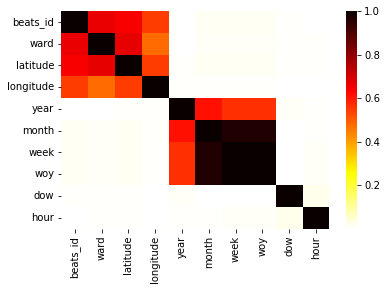

In [13]:
heatma = new_data.drop(columns=['x_co','y_co'])
sns.heatmap(heatma.corr().abs(),cmap='hot_r')

In [16]:
loc = data_2021.groupby('location').count().sort_values(by='case_id',ascending=False).iloc[:,1]

In [17]:
feature_over_105 = list(loc.loc[loc>=105].index)
feature_under_105 = [x for x in loc.index if x not in feature_over_105]
data_over_105 = data_2021.loc[new_data.location.isin(feature_over_105)]
data_under_105 = data_2021.loc[new_data.location.isin(feature_under_105)]

In [18]:
data_under_105.reset_index(drop=True)

,case_id,date,block,crime_code,fisrt_de,second_de,location,arrested,domestic,beats_id,...,y_co,latitude,longitude,real_loc,year,month,week,woy,dow,hour
0,JE320487,2021-07-31 00:00:00,031XX W LOGAN BLVD,0460,BATTERY,SIMPLE,"VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER...",N,N,1414,...,1916967.0,41.927972,-87.706253,"(41.927972442, -87.70625256)",2021,7,30,30,5,0
1,JE459953,2021-11-29 07:45:00,051XX W 55TH ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,AIRPORT PARKING LOT,N,N,814,...,1867661.0,41.792902,-87.751397,"(41.79290166, -87.751396529)",2021,11,48,48,0,7
2,JE459849,2021-11-29 02:30:00,0000X S MIDWAY ST,0820,THEFT,$500 AND UNDER,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,N,N,813,...,1866019.0,41.788340,-87.740514,"(41.788339891, -87.740514226)",2021,11,48,48,0,2
3,JE459929,2021-11-29 00:01:00,054XX W 63RD ST,1305,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,AIRPORT EXTERIOR - NON-SECURE AREA,N,N,813,...,1862265.0,41.778127,-87.757961,"(41.778126507, -87.757960769)",2021,11,48,48,0,0
4,JE400871,2021-10-06 23:35:00,0000X W TERMINAL ST,1335,CRIMINAL TRESPASS,TO AIRPORT,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,Y,N,1652,...,1934289.0,41.976421,-87.904976,"(41.9764212, -87.904976266)",2021,10,40,40,2,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,JF134458,2021-11-15 18:00:00,005XX E 51ST ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,LAKEFRONT / WATERFRONT / RIVERBANK,N,N,233,...,NaN,NaN,NaN,NaN,2021,11,46,46,0,18
2140,JE490692,2021-12-28 03:48:00,012XX W DEVON AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,PAWN SHOP,N,N,2432,...,1942639.0,41.998172,-87.662157,"(41.998172401, -87.662156803)",2021,12,52,52,1,3
2141,JE491521,2021-12-28 22:45:00,006XX W OHARE ST,0560,ASSAULT,SIMPLE,WAREHOUSE,N,N,1654,...,1929579.0,41.963529,-87.914031,"(41.963529375, -87.914030573)",2021,12,52,52,1,22
2142,JE253448,2021-06-04 09:20:00,053XX S LAFLIN ST,2093,NARCOTICS,FOUND SUSPECT NARCOTICS,ABANDONED BUILDING,Y,N,934,...,1869302.0,41.796919,-87.662233,"(41.796918756, -87.662232804)",2021,6,22,22,4,9


In [19]:
loc.median()

90.0

<AxesSubplot:xlabel='latitude'>

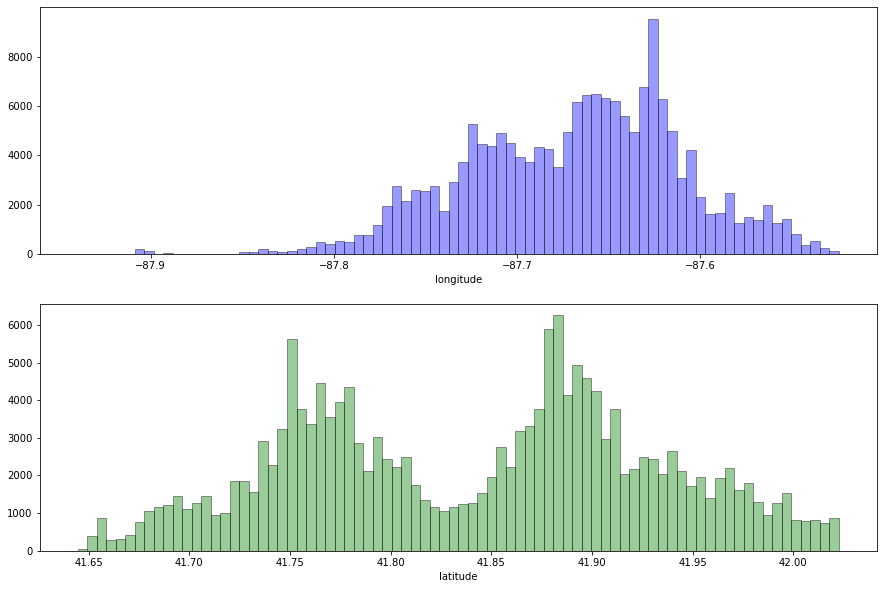

In [21]:
fig,axe = plt.subplots(nrows=2,figsize=(15,10))
sns.distplot(data_over_105['longitude'],ax=axe[0],bins=80,hist_kws=dict(edgecolor='black'),color='b',
            label='longitude',kde=False)
sns.distplot(data_over_105['latitude'],ax=axe[1],bins=80,hist_kws=dict(edgecolor='black'),color='g',
            label='latitude',kde=False)

In [22]:
data_over_105.latitude.min()

41.644607723

In [23]:
data_more = data_over_105.copy()
data_less = data_under_105.copy()
data_more.dropna(inplace=True)
data_less.dropna(inplace=True)

In [24]:
data_more['new_lon'] = list(map(int,(data_more['longitude'].abs()-87.51)*10000))
data_more['new_la'] = list(map(int,(data_more['latitude']-41.64)*10000))

In [25]:
data_more.head()

,case_id,date,block,crime_code,fisrt_de,second_de,location,arrested,domestic,beats_id,...,longitude,real_loc,year,month,week,woy,dow,hour,new_lon,new_la
1,JE362576,2021-09-05 14:47:00,102XX S VERNON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,N,Y,511,...,-87.612580,"(41.708514886, -87.61258026)",2021,9,35,35,6,14,1025,685
2,JE364188,2021-09-07 01:00:00,033XX W MAYPOLE AVE,0560,ASSAULT,SIMPLE,SIDEWALK,Y,N,1123,...,-87.709735,"(41.883578698, -87.709734846)",2021,9,36,36,1,1,1997,2435
3,JE364232,2021-09-07 02:26:00,062XX S UNION AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESTAURANT,N,N,711,...,-87.642627,"(41.780509717, -87.642627358)",2021,9,36,36,1,2,1326,1405
4,JE369345,2021-08-14 06:20:00,0000X W TERMINAL ST,0890,THEFT,FROM BUILDING,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,N,N,1651,...,-87.906463,"(41.979006297, -87.906463155)",2021,8,32,32,5,6,3964,3390
5,JE364509,2021-09-07 10:45:00,014XX S SAWYER AVE,0460,BATTERY,SIMPLE,SIDEWALK,N,N,1022,...,-87.706764,"(41.862096997, -87.706764478)",2021,9,36,36,1,10,1967,2220


In [26]:
data_more.new_la.max()

3825

In [27]:
summ = pd.DataFrame(data_more.groupby(['new_lon','new_la'])['case_id'].count())
summ.reset_index(inplace=True)
summ.rename(columns={'case_id':'times'},inplace=True)
summ['times'].mean()

2.386422904828571

In [28]:
def plot(summary):
    rgb = np.zeros((4300,3900,3),dtype='uint8')
    lo_list = summary.iloc[:,0].unique()
    for item in lo_list:
        la_list = summary.loc[summary.iloc[:,0]==item].iloc[:,1].tolist()
        count = summary.loc[summary.iloc[:,0]==item].iloc[:,2].tolist()
        for point in la_list:
            a = count[la_list.index(point)]
            if a > 100:
                rgb[item,point,0] = 255
                rgb[item,point,1] = 0
                rgb[item,point,2] = 0
            elif a > 10:
                rgb[item,point,0] = 0
                rgb[item,point,1] = 255
                rgb[item,point,2] = 0
            else:
                rgb[item,point,0] = 0
                rgb[item,point,1] = 0
                rgb[item,point,2] = 255
    return rgb

In [29]:
def plotimage(summary):
    rgb = np.zeros((4300,3900,3),dtype='uint8')
    lo_list = summary.iloc[:,0].unique()
    for point in lo_list:
        la_list = summary.loc[summary.iloc[:,0]==point].iloc[:,1].tolist()
        unit = summary.loc[summary.iloc[:,0]==point].iloc[:,2].tolist()
        for item in la_list:
            a = unit[la_list.index(item)]
            if a//50>0:
                rgb[item-5:item+5,point-5:point+5,0] = 255
                rgb[item-5:item+5,point-5:point+5,1] = 0
                rgb[item-5:item+5,point-5:point+5,2] = 0
            elif a//10>0:
                rgb[item-5:item+5,point-5:point+5,0] = 0
                rgb[item-5:item+5,point-5:point+5,1] = 255
                rgb[item-5:item+5,point-5:point+5,2] = 0
            else:
                rgb[item-5:item+5,point-5:point+5,0] = 0
                rgb[item-5:item+5,point-5:point+5,1] = 0
                rgb[item-5:item+5,point-5:point+5,2] = 255
    #rgb[0:200,0:2000,0]=255
    return rgb

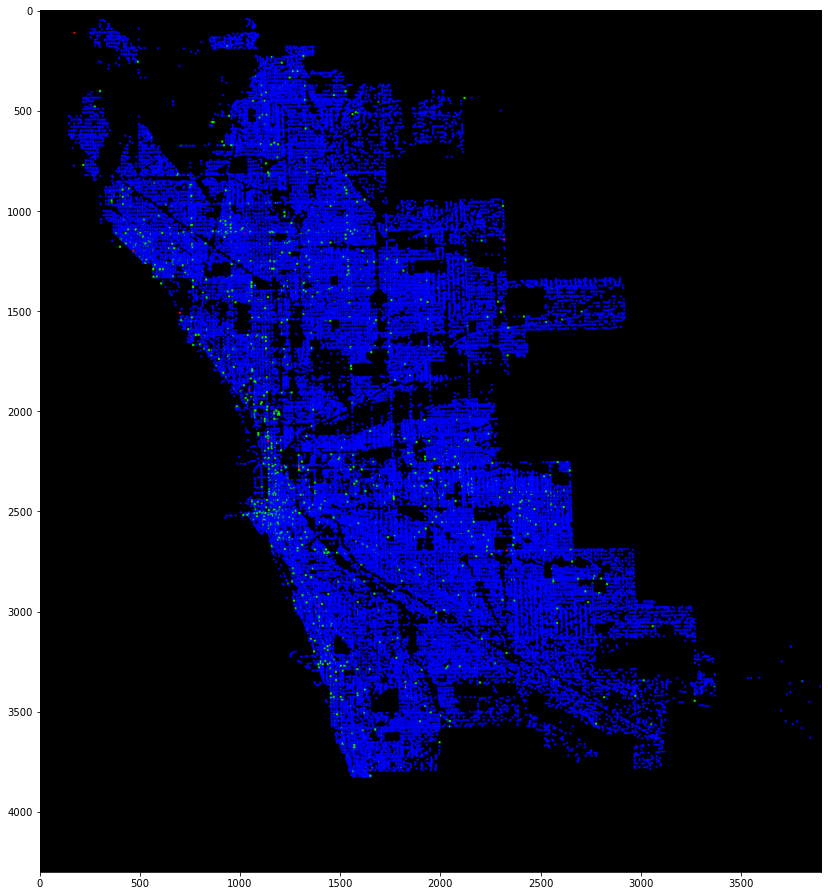

In [30]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(14,20))
ax.imshow(plotimage(summ),cmap='YlGnBu')

In [31]:
a = summ.iloc[:,0].unique()
b = summ.loc[summ.iloc[:,0]==163].iloc[:,1].tolist()
c = summ.loc[summ.iloc[:,0]==163].iloc[:,2].tolist()
c

[1]

In [15]:
data_2021 = new_data.loc[new_data['year']==2021].copy()

/Users/bearpapa/miniforge3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'crimes happened in which week of year')

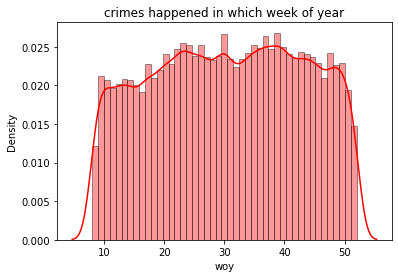

In [33]:
sns.distplot(data_2021['woy'],bins=45,hist_kws=dict(edgecolor='black'),color='red')
plt.title('crimes happened in which week of year')

/Users/bearpapa/miniforge3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'what time does a crime happened within a day')

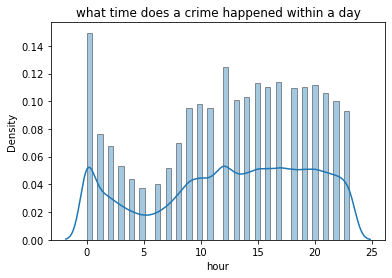

In [39]:
sns.distplot(data_2021['hour'],hist_kws=dict(edgecolor='black'))
plt.title('what time does a crime happened within a day')

In [40]:
def changeN_Y_to_num(row):
    if row == 'N':
        return 0
    elif row == 'Y':
        return 1
data_2021['arrested'] = data_2021['arrested'].apply(changeN_Y_to_num)
data_2021['domestic'] = data_2021['domestic'].apply(changeN_Y_to_num)

<AxesSubplot:>

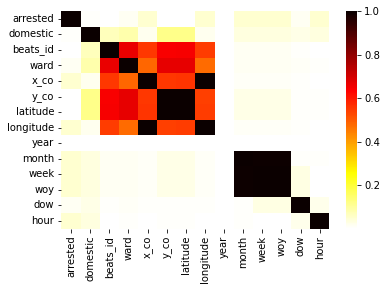

In [41]:
sns.heatmap(data_2021.corr().abs(),cmap='hot_r')

In [42]:
data_2021.dtypes

case_id               object
date          datetime64[ns]
block                 object
crime_code            object
fisrt_de              object
second_de             object
location              object
arrested               int64
domestic               int64
beats_id               int64
ward                 float64
fbi_cd                object
x_co                 float64
y_co                 float64
latitude             float64
longitude            float64
real_loc              object
year                   int64
month                  int64
week                   int64
woy                    int64
dow                    int64
hour                   int64
dtype: object

In [43]:
data_depression = data_2021.groupby(['fisrt_de'])

In [44]:
a = data_depression['case_id'].count().sort_values(ascending=False)[:50]

In [111]:
a.index[0]

'THEFT'

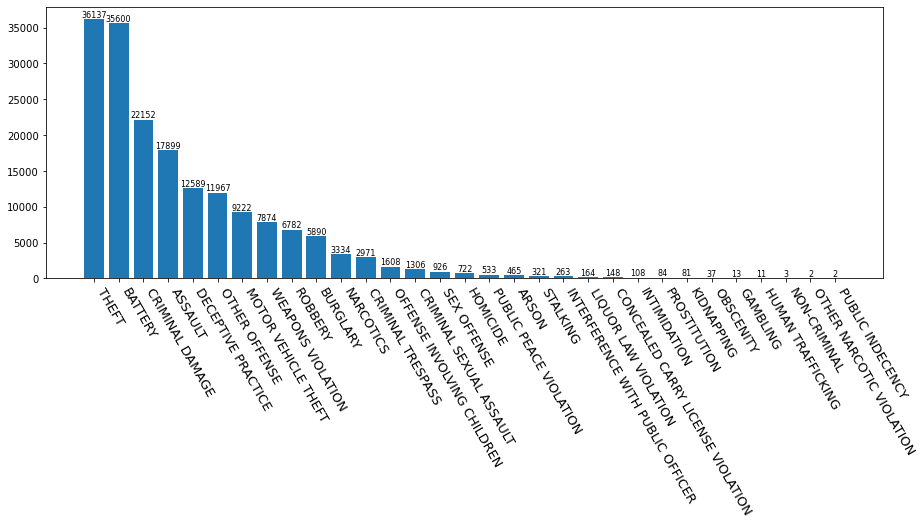

In [179]:
plt.figure(figsize=(15,5),edgecolor='black')
plt.bar(x=a.index,height=a.values)
plt.xticks(rotation=300,fontsize=13,va='top',ha='left')
for item, item1 in zip(a.index,a.values):
    plt.text(x=item,y=item1+1,s=item1,ha='center',va='bottom',fontsize=8)
plt.show()

Text(0.5, 1.0, 'detail about the crime of THEFT')

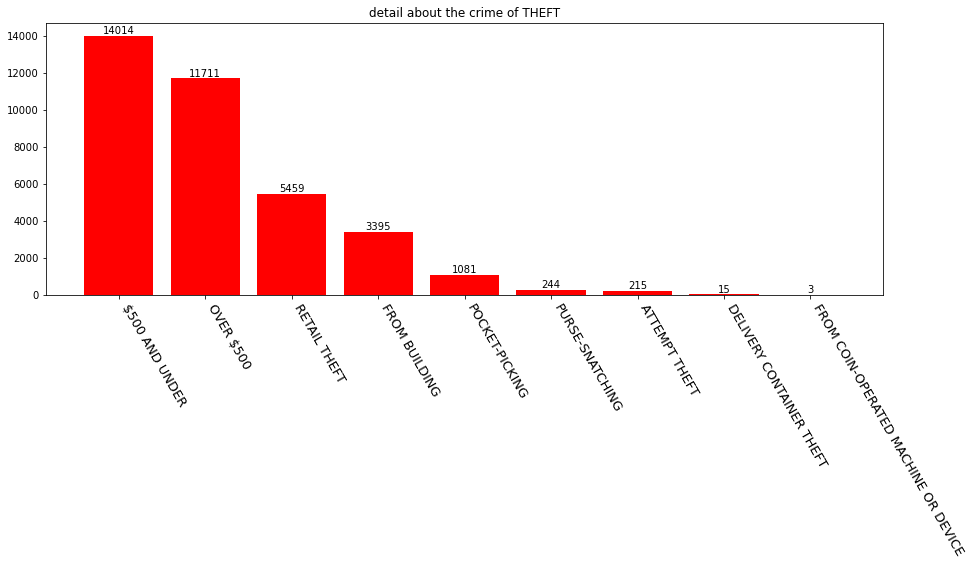

In [211]:
b = data_2021.loc[data_2021['fisrt_de']=='THEFT']['second_de'].value_counts()
plt.figure(figsize=(15,5))
plt.bar(x=b.index,height=b.values,color='r')
plt.xticks(rotation=300,fontsize=13,va='top',ha='left')
for x,y in zip(b.index,b.values):
    plt.text(x,y+0.1,y,va='bottom',ha='center')
plt.title('detail about the crime of THEFT')
#b.values

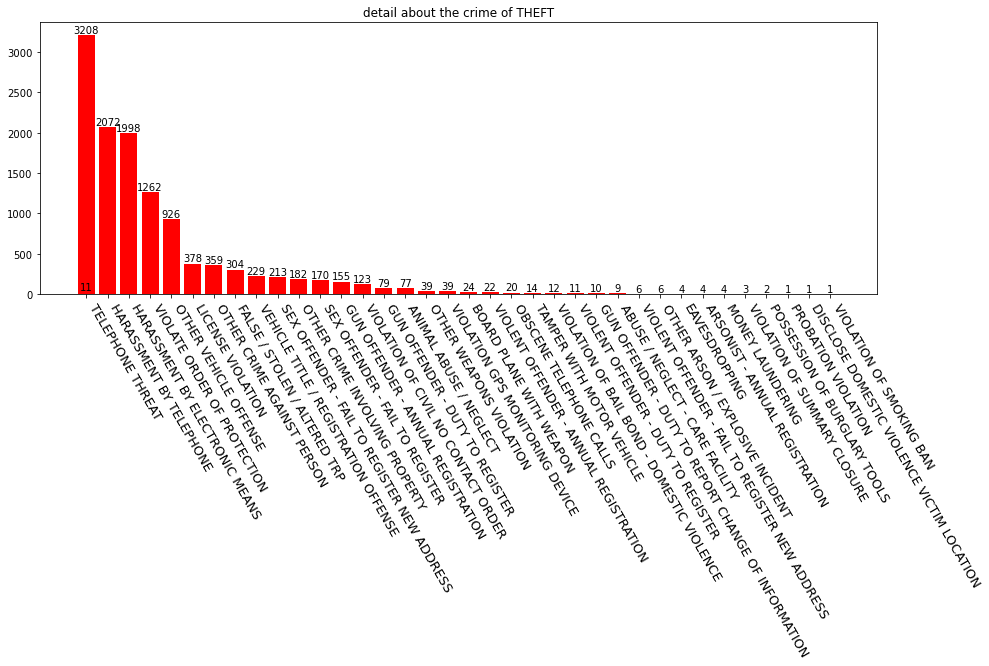

In [237]:
b = data_2021.loc[data_2021['fisrt_de']=='OTHER OFFENSE']['second_de'].value_counts()
plt.figure(figsize=(15,5))
plt.bar(x=b.index,height=b.values,color='r')
plt.xticks(rotation=300,fontsize=13,va='top',ha='left')
for x,y in zip(b.index,b.values):
    plt.text(x,y+0.1,y,va='bottom',ha='center')
plt.text(x='TELEPHONE THREAT',y=30,s='11',va='bottom',ha='center')
plt.title('detail about the crime of THEFT')
plt.show()
#b.values

Text(30, 30, '1')

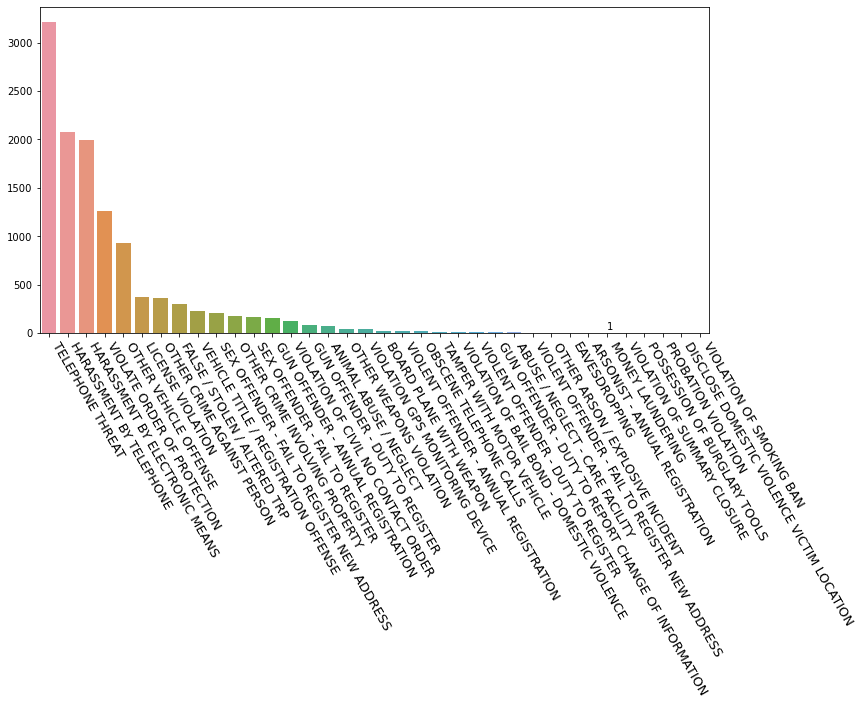

In [265]:
board = sns.barplot(x=b.index,y=b.values)
board.figure.set_size_inches(12,6)
#plt.xticks(rotation=300,fontsize=13,va='top',ha='left')
board.set_xticklabels(labels=b.index,rotation=300,fontsize=13,va='top',ha='left')
board.text(x=30,y=30,s='1')
#for x,y in zip(b.index,b.values):
#    board.text(x=x,y=y+0.5,s=y)
#    board
#    plt.text(x=x,y=y,s='1')

In [151]:
data_2021.groupby('beats_id')['case_id'].count().sort_values(ascending=False)

beats_id
1834    1945
421     1616
624     1552
511     1371
631     1285
        ... 
1621     225
1653     193
1654     185
1652      61
1655      61
Name: case_id, Length: 274, dtype: int64

In [268]:
#data_2021.dropna(inplace=True)
data_2021.head()

,case_id,date,block,crime_code,fisrt_de,second_de,location,arrested,domestic,beats_id,...,y_co,latitude,longitude,real_loc,year,month,week,woy,dow,hour
1,JE362576,2021-09-05 14:47:00,102XX S VERNON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,0,1,511,...,1837198.0,41.708515,-87.612580,"(41.708514886, -87.61258026)",2021,9,35,35,6,14
2,JE364188,2021-09-07 01:00:00,033XX W MAYPOLE AVE,0560,ASSAULT,SIMPLE,SIDEWALK,1,0,1123,...,1900783.0,41.883579,-87.709735,"(41.883578698, -87.709734846)",2021,9,36,36,1,1
3,JE364232,2021-09-07 02:26:00,062XX S UNION AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESTAURANT,0,0,711,...,1863365.0,41.780510,-87.642627,"(41.780509717, -87.642627358)",2021,9,36,36,1,2
4,JE369345,2021-08-14 06:20:00,0000X W TERMINAL ST,0890,THEFT,FROM BUILDING,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,0,0,1651,...,1935229.0,41.979006,-87.906463,"(41.979006297, -87.906463155)",2021,8,32,32,5,6
5,JE364509,2021-09-07 10:45:00,014XX S SAWYER AVE,0460,BATTERY,SIMPLE,SIDEWALK,0,0,1022,...,1892961.0,41.862097,-87.706764,"(41.862096997, -87.706764478)",2021,9,36,36,1,10


In [269]:
data_2021.dtypes

case_id               object
date          datetime64[ns]
block                 object
crime_code            object
fisrt_de              object
second_de             object
location              object
arrested               int64
domestic               int64
beats_id               int64
ward                 float64
fbi_cd                object
x_co                 float64
y_co                 float64
latitude             float64
longitude            float64
real_loc              object
year                   int64
month                  int64
week                   int64
woy                    int64
dow                    int64
hour                   int64
dtype: object

In [275]:
from sklearn.linear_model import LinearRegression